# Deep Learning ISD

## Auteurs

| Nom  | Prénom | Courriel | Groupe | Github |
| :-------------: | :-------------: | :-------------: | :-------------: | :-------------: |
| AIT BELKACEM  | Moncef Karim  | moncef.ait-belkacem@universite-paris-saclay.fr  | LDDIM2  |<a href="https://github.com/MK8BK">MK8BK</a>|
| Tran--Guery | Thimoté | thimote.tran--guery@universite-paris-saclay.fr  | LDDIM2  |<a href="https://github.com/Thimote91">Thimote91</a>|


## Introduction
Ceci est le projet final de l'UE <a href="https://nicolas.thiery.name/Enseignement/IntroScienceDonnees/">Initiation à la Science des Données</a> offert en L1-S2 à l'Université Paris-Saclay.

Il s'agit d'un classificateur de caractères hexadécimaux manuscrits en python.

Plus précisément, c’est une implémentation d’un réseau neuronal, visant la prédiction de caractères manuscrits de `0-9/A-F` (16 classes),

dans le data set `EMNIST`.

On utilise pour cela le module de calcul numérique `numpy`, le module de visualisation `matplotlib` et le module de traitement d'image `PIL`.

(En outre des modules suivants de la librairie standard python : `os`, `random`, `pickle`, `typing`)

## Aspects Théoriques 

A completer ...


## Détails de l'implémentation 
   

### Set de données

On dispose de `38400` images, reparties en `16` classes, soit `2400` images par classe.

Chaque image est au format `jpeg`.

Ces fichiers sont dans le dossier `./EMNIST_DATA_SET/{classe de l'image}/{nom de l'image}.jpeg`.

De plus chaque image contient sa classe en premier caractère.


<img src="./EMNIST_DATA_SET/0/0_char_102479.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/1/1_char_16442.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/2/2_char_7136.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/3/3_char_55992.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/4/4_char_80661.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/5/5_char_73026.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/6/6_char_19045.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/7/7_char_107973.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/8/8_char_22810.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/9/9_char_110343.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/A/A_char_4502.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/B/B_char_9251.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/C/C_char_15156.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/D/D_char_35808.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/E/E_char_712.jpeg"  width=56 style="float: left">
<img src="./EMNIST_DATA_SET/F/F_char_99118.jpeg" width=56 style="float: left">
<br><br><br><br>

Par exemple : `./EMNIST_DATA_SET/0/0_char_102479.jpeg` est le path vers la première image (celle du 0)

### Modularité

Notre implémentation de Deep Learning se décompose en 6 fichiers situes dans le dossier `./src/` :
 - `LoadData.py`
 - `Functions.py`
 - `Layers.py`
 - `NeuralNetwork.py`
 - `Utilities.py`

Importons ces six fichiers :

In [1]:
from src.LoadData import *
from src.Functions import *
from src.Layers import *
from src.NeuralNetwork import *
from src.Utilities import *

Utilisons la fonction `show_source()` définie dans `./src/Utilities.py` afin d'observer en détails les objets qui seront manipulés par la suite.

### `LoadData`

In [11]:
#Global list[str] of classes(single characters)
print(CLASSES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']


In [12]:
help(char_to_label)

Help on function char_to_label in module src.LoadData:

char_to_label(character: str) -> int
    Convert the character representation of the class into its integer representation
    @param: character: str , has to be in the global defined classes
    @return: the integer representation of said character



In [14]:
help(label_to_char)

Help on function label_to_char in module src.LoadData:

label_to_char(label: int) -> str
    Convert the integer representation of the class into its character representation
    @param: label: int , has to be a valid index of the global defined classes
    @return: the character representation of said integer



In [16]:
help(load_pil_image)

Help on function load_pil_image in module src.LoadData:

load_pil_image(str_path: str) -> <module 'PIL.Image' from 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\PIL\\Image.py'>
    Returns a grayscale PIL image given the full relative str_path
    @param: str_path: the full relative str_path to the image file
    @return: im: a PIL Image object (single channel: grayscale)



In [18]:
print(inspect.getsource(load_pil_image))

def load_pil_image(str_path: str) -> Image:
    """
        Returns a grayscale PIL image given the full relative str_path
        @param: str_path: the full relative str_path to the image file
        @return: im: a PIL Image object (single channel: grayscale)
    """
    temp = Image.open(str_path)
    if "F" in str_path:
        im = temp.rotate(180)
    else:
        im = temp.rotate(270)
    temp.close()
    im = ImageOps.grayscale(im)
    return im



### `Functions`

### `Layers`

### `NeuralNetwork`

### `Utilities`

## Démonstration


### Entrainement

In [2]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes

In [14]:
accuracies = []
costs = []
batch_size = 64
lr = 2
epochs = 1200
SCE = SoftmaxCrossEntropyLoss()
layers = [DenseActivatedLayer(112, 784, ReLu), OutputLayer(16, 112, SCE)]
X, Y = load_data_set("./EMNIST_DATA_SET/")
nn = NeuralNetwork(layers, classes=CLASSES)

In [15]:
%%time
for i in range(epochs):
    x, y = load_training_set("./EMNIST_DATA_SET/", batch_size=batch_size, classes=CLASSES, equilibrium=True)
    res = nn.forward(x)
    nn.backward(y)
#   percent = percent_good(res, Y)
#   cost = compute_cost(res, Y)
    if i%30==0:
        pred = nn.forward(X)
        percent = percent_good(pred, Y)
        cost = compute_cost(pred, Y)
        accuracies.append(percent)
        costs.append(cost)
        print(f"Iteration: {i:4} | Accuracy: {percent} %")

Iteration:    0 | Accuracy: 19.6171875 %
Iteration:   30 | Accuracy: 58.151041666666664 %
Iteration:   60 | Accuracy: 77.734375 %
Iteration:   90 | Accuracy: 82.79166666666667 %
Iteration:  120 | Accuracy: 78.36979166666667 %
Iteration:  150 | Accuracy: 83.85416666666667 %
Iteration:  180 | Accuracy: 86.58333333333333 %
Iteration:  210 | Accuracy: 86.55208333333333 %
Iteration:  240 | Accuracy: 88.54427083333333 %
Iteration:  270 | Accuracy: 86.17708333333333 %
Iteration:  300 | Accuracy: 88.52083333333333 %
Iteration:  330 | Accuracy: 90.74479166666667 %
Iteration:  360 | Accuracy: 89.64322916666667 %
Iteration:  390 | Accuracy: 91.15625 %
Iteration:  420 | Accuracy: 90.484375 %
Iteration:  450 | Accuracy: 91.80729166666667 %
Iteration:  480 | Accuracy: 91.37239583333333 %
Iteration:  510 | Accuracy: 91.96875 %
Iteration:  540 | Accuracy: 92.51822916666667 %
Iteration:  570 | Accuracy: 92.82552083333333 %
Iteration:  600 | Accuracy: 92.59635416666667 %
Iteration:  630 | Accuracy: 92.6

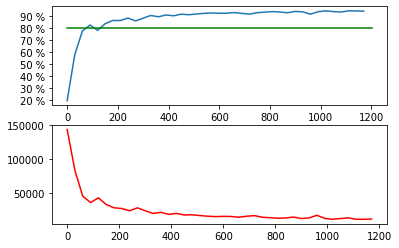

In [16]:
figure, axis = plt.subplots(2, 1)
axis[0].plot(list(range(0,epochs, 30)), accuracies)#s=1
axis[1].plot(list(range(0,epochs, 30)), costs, color="red")#s=1
ytickss = [str(i)+" %" for i in range(0,101,10)]
axis[0].set_yticks(list(range(0,101,10)), ytickss)
axis[0].plot([0,epochs+1],[80,80], color="green")
plt.show()

### Exemple concret

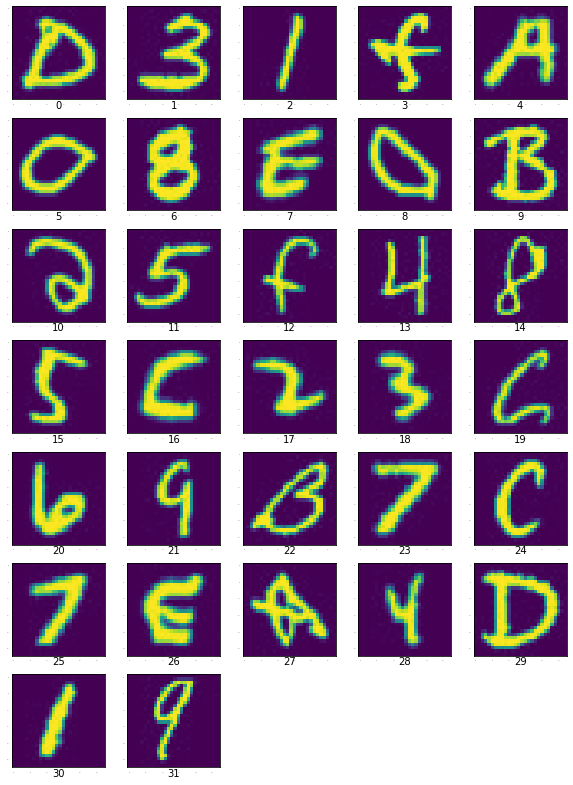

In [3]:
batch = make_random_batch("./EMNIST_DATA_SET/", 32, CLASSES, equilibrium=True)
imgs = [load_pil_image(f) for f in batch]
image_grid(imgs)#, #titles=[" "]*len(batch))

sauvegarde du models

In [ ]:
import pickle


## Applications

Repositoire github https://github.com/MK8BK/Classification_Hex_lddim2/rapport